In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15270, done.
remote: Counting objects: 100% (291/291), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 15270 (delta 151), reused 175 (delta 106), pack-reused 14979
Receiving objects: 100% (15270/15270), 6.30 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (11018/11018), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:0

In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
import detectron2.data.transforms as T
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.data import DatasetMapper
from detectron2.data.datasets import register_coco_instances


In [ ]:
#batch_list=['20230523','20230526','20230530','20230602']
#batch_list=['20230523','20230526','20230530']
batch_list=['20230523','20230526','20230530','20230602','20230720']
sub_batch_list=['A0H100','A0H50','A30H100','A30H50']
#sub_batch_list=['A0H50','A30H50']

#DatasetCatalog.remove('20230526_A0H100_train')
#For Glasshouse images
for d in ["train", "val"]:
    for bl in batch_list:
      #register_coco_instances(bl+'_'+d, {}, bl+'_combined_'+d+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")
      register_coco_instances(bl+'_'+d, {}, bl+'_combined_'+d+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")
      for sbl in sub_batch_list:
        #register_coco_instances(sbl+'_'+bl+'_'+d, {}, 'annotation_'+sbl+'_'+bl+'_'+d+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")
        register_coco_instances(sbl+'_'+bl+'_'+d, {}, 'annotation_'+sbl+'_'+bl+'_'+d+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")
        metadata = MetadataCatalog.get(sbl+'_'+bl+'_'+d)
        print(metadata)

#For Field images
#register_coco_instances('A0H50_20230720_train', {}, 'annotation_'+'A0H50_20230720_train'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")
#register_coco_instances('A0H50_20230720_val', {}, 'annotation_'+'A0H50_20230720_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")
#register_coco_instances('A0H50_20230720_train', {}, 'annotation_'+'A0H50_20230720_train'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")
#register_coco_instances('A0H50_20230720_val', {}, 'annotation_'+'A0H50_20230720_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")

#register_coco_instances('field_combined_val', {}, 'annotation_field_20230720_combined_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")
register_coco_instances('field_combined_val', {}, 'annotation_field_20230720_combined_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")
#For glasshouse combined
register_coco_instances('glasshouse_combined_val', {}, 'annotation_glasshouse_combined_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")
register_coco_instances('glasshouse_no20230602_combined_val', {}, 'annotation_glasshouse_no20230602_combined_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train")
#register_coco_instances('glasshouse_combined_val', {}, 'annotation_glasshouse_combined_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")
#register_coco_instances('glasshouse_no20230602_combined_val', {}, 'annotation_glasshouse_no20230602_combined_val'+'.json', "/content/drive/MyDrive/Dissertation/Data/20230530/train/withSoilMask")

%cd '/content/drive/MyDrive/Dissertation/Data/20230530/train'

Metadata(name='A0H100_20230523_train', json_file='annotation_A0H100_20230523_train.json', image_root='/content/drive/MyDrive/Dissertation/Data/20230530/train', evaluator_type='coco')
Metadata(name='A0H50_20230523_train', json_file='annotation_A0H50_20230523_train.json', image_root='/content/drive/MyDrive/Dissertation/Data/20230530/train', evaluator_type='coco')
Metadata(name='A30H100_20230523_train', json_file='annotation_A30H100_20230523_train.json', image_root='/content/drive/MyDrive/Dissertation/Data/20230530/train', evaluator_type='coco')
Metadata(name='A30H50_20230523_train', json_file='annotation_A30H50_20230523_train.json', image_root='/content/drive/MyDrive/Dissertation/Data/20230530/train', evaluator_type='coco')
Metadata(name='A0H100_20230526_train', json_file='annotation_A0H100_20230526_train.json', image_root='/content/drive/MyDrive/Dissertation/Data/20230530/train', evaluator_type='coco')
Metadata(name='A0H50_20230526_train', json_file='annotation_A0H50_20230526_train.json

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
model_path='/content/drive/MyDrive/Dissertation/Data/20230530/Archive/20230916_1'
model_name='model_final.pth'
cfg.MODEL.WEIGHTS = os.path.join(model_path, model_name)  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
predictor = DefaultPredictor(cfg)
#predictor = CustomPredictor(cfg)

[10/17 13:54:02 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Dissertation/Data/20230530/Archive/20230916_1/model_final.pth ...


<Axes: xlabel='iteration'>

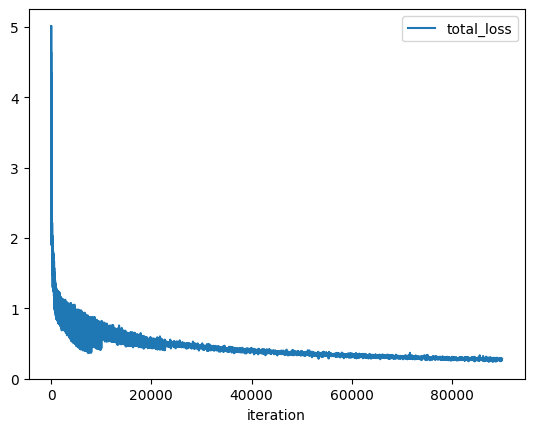

In [ ]:
import pandas as pd
df = pd.read_json('/content/drive/MyDrive/Dissertation/Data/20230530/Archive/20230916_1/metrics.json',lines=True)
df.sort_values(by=['iteration']).plot(x='iteration', y='total_loss')


In [ ]:
import pandas as pd
df = pd.read_json('/content/drive/MyDrive/Dissertation/Data/20230530/Archive/20230916_2/metrics.json',lines=True)
df.sort_values(by=['iteration']).plot(x='iteration', y='total_loss')

In [ ]:
!lsof -i:6006

COMMAND    PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
tensorboa 4445 root   14u  IPv4 183374      0t0  TCP localhost:6006 (LISTEN)


In [ ]:
!kill -9 4445

In [ ]:
#For visualise result
from detectron2.utils.visualizer import ColorMode

#batch_list=['20230526']
#sub_batch_list=['A0H100','A0H50','A30H100','A30H50']
#sub_batch_list=['A0H50']

val_metadata_20230530 = MetadataCatalog.get("20230530_val")
val_dicts_20230530 = DatasetCatalog.get("20230530_val")

single = False

for d in val_dicts_20230530:
  tmpFileName = 'A0H50-0526-47.jpg'
  if tmpFileName in d["file_name"] and single:
      print(d)
      d["file_name"] = '/content/drive/MyDrive/Dissertation/Data/20230530/train/testImg/' + tmpFileName
      im = cv2.imread(d["file_name"])
      outputs = predictor(im)
      v = Visualizer(im[:, :, ::-1],
                    metadata=val_metadata_20230530,
                    scale=0.8,
                    instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels
      )
      v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      cv2_imshow(v.get_image()[:, :, ::-1])
  elif not single:
      im = cv2.imread(d["file_name"])
      img_resized = cv2.resize(im, (600,400))
      outputs = predictor(img_resized)
      print(d)
      v = Visualizer(img_resized[:, :, ::-1],
                    metadata=val_metadata_20230530,
                    scale=0.8,
                    instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels
      )
      v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
#Original evaluation metrics for single dataset
import pandas as pd
import torch
from detectron2.structures import Boxes, pairwise_iou
from matplotlib import pyplot as plt

val_metadata_20230530 = MetadataCatalog.get("A0H50_20230526_val")
val_dicts_20230530 = DatasetCatalog.get("A0H50_20230526_val")

resizeScaleX=400/1365
resizeScaleY=600/2048
imageSizeX=400
imageSizeY=600
#resizeScaleX=1365/1365
#resizeScaleY=2048/2048
#imageSizeX=1365
#imageSizeY=2048

def coco_bbox_to_coordinates(bbox):
    out = bbox.copy().astype(float)
    #out[:, 2] = bbox[:, 0] + bbox[:, 2]
    #out[:, 3] = bbox[:, 1] + bbox[:, 3]
    out[:, 0] = bbox[:, 0]*resizeScaleX
    out[:, 1] = bbox[:, 1]*resizeScaleY
    out[:, 2] = (bbox[:, 0] + bbox[:, 2])*resizeScaleX
    out[:, 3] = (bbox[:, 1] + bbox[:, 3])*resizeScaleY
    return out

def conf_matrix_calc(labels, detections, n_classes, conf_thresh, iou_thresh):
    confusion_matrix = np.zeros([n_classes + 1, n_classes + 1])
    l_classes = np.array(labels)[:, 0].astype(int)
    l_bboxs = coco_bbox_to_coordinates((np.array(labels)[:, 1:]))
    d_confs = np.array(detections)[:, 4]
    d_bboxs = (np.array(detections)[:, :4])
    d_classes = np.array(detections)[:, -1].astype(int)
    detections = detections[np.where(d_confs > conf_thresh)]
    labels_detected = np.zeros(len(labels))
    detections_matched = np.zeros(len(detections))
    for l_idx, (l_class, l_bbox) in enumerate(zip(l_classes, l_bboxs)):
        for d_idx, (d_bbox, d_class) in enumerate(zip(d_bboxs, d_classes)):
            iou = pairwise_iou(Boxes(torch.from_numpy(np.array([l_bbox]))), Boxes(torch.from_numpy(np.array([d_bbox]))))
            if iou >= iou_thresh:
                confusion_matrix[l_class, d_class] += 1
                labels_detected[l_idx] = 1
                detections_matched[d_idx] = 1
    for i in np.where(labels_detected == 0)[0]:
        confusion_matrix[l_classes[i], -1] += 1
    for i in np.where(detections_matched == 0)[0]:
        confusion_matrix[-1, d_classes[i]] += 1
    return confusion_matrix

n_classes = 4
confusion_matrix = np.zeros([n_classes + 1, n_classes + 1])
for d in val_dicts_20230530:
    img = cv2.imread(d["file_name"])
    img_resized = cv2.resize(img, (imageSizeY,imageSizeX))
    #plt.imshow(img)
    #plt.show()
    #plt.imshow(img_resized)
    #plt.show()
    #outputs = predictor(img)
    outputs = predictor(img_resized)
    labels = list()
    detections = list()
    for coord, conf, cls, ann in zip(
        outputs["instances"].get("pred_boxes").tensor.cpu().numpy(),
        outputs["instances"].get("scores").cpu().numpy(),
        outputs["instances"].get("pred_classes").cpu().numpy(),
        d["annotations"]
    ):
        labels.append([ann["category_id"]] + ann["bbox"])
        detections.append(list(coord) + [conf] + [cls])
    confusion_matrix += conf_matrix_calc(np.array(labels), np.array(detections), n_classes, conf_thresh=0.5, iou_thresh=0.5)
matrix_indexes = val_metadata_20230530.get("thing_classes") + ["null"]
pd.DataFrame(confusion_matrix, columns=matrix_indexes, index=matrix_indexes)

[09/21 13:06:41 d2.data.datasets.coco]: Loaded 20 images in COCO format from annotation_A0H50_20230526_val.json
Metadata(name='A0H50_20230526_val', json_file='annotation_A0H50_20230526_val.json', image_root='/content/drive/MyDrive/Dissertation/Data/20230530/train', evaluator_type='coco', thing_classes=['wheat', 'wild oat', 'brome grass', 'barley grass'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3})
[{'file_name': '/content/drive/MyDrive/Dissertation/Data/20230530/train/A0H50-0526-01.jpg', 'height': 1365, 'width': 2048, 'image_id': 49, 'annotations': [{'iscrowd': 0, 'bbox': [0.0, 0.0, 210.0, 73.0], 'category_id': 0, 'segmentation': [[0.0, 32.0, 43.0, 47.0, 71.0, 51.0, 140.0, 68.0, 182.0, 73.0, 184.0, 67.0, 179.0, 63.0, 167.0, 60.0, 162.0, 54.0, 162.0, 50.0, 172.0, 38.0, 188.0, 30.0, 191.0, 20.0, 205.0, 9.0, 210.0, 0.0, 187.0, 0.0, 186.0, 4.0, 159.0, 26.0, 148.0, 46.0, 125.0, 39.0, 115.0, 32.0, 92.0, 27.0, 89.0, 22.0, 91.0, 18.0, 98.0, 16.0, 110.0, 17.0, 122.0, 21.0, 131.0

,wheat,wild oat,brome grass,barley grass,null
wheat,10.0,2.0,0.0,0.0,3.0
wild oat,4.0,27.0,4.0,1.0,3.0
brome grass,5.0,7.0,9.0,1.0,5.0
barley grass,4.0,5.0,7.0,3.0,5.0
null,2.0,5.0,3.0,3.0,0.0


In [ ]:
#Evaluation metrics for multiple datasets
import pandas as pd
import torch
from detectron2.structures import Boxes, pairwise_iou
from matplotlib import pyplot as plt

dataSetList = ['A0H50_20230523_val','A30H50_20230523_val','A0H100_20230523_val','A30H100_20230523_val',
               'A0H50_20230526_val','A30H50_20230526_val','A0H100_20230526_val','A30H100_20230526_val',
               'A0H50_20230530_val','A30H50_20230530_val','A0H100_20230530_val','A30H100_20230530_val']
               #'A0H50_20230602_val','A30H50_20230602_val','A0H100_20230602_val','A30H100_20230602_val',
               #'A0H50_20230720_val','A30H50_20230720_val','A0H100_20230720_val','A30H100_20230720_val']

resizeScaleX=400/1365
resizeScaleY=600/2048
imageSizeX=400
imageSizeY=600
#resizeScaleX=1365/1365
#resizeScaleY=2048/2048
#imageSizeX=1365
#imageSizeY=2048

def coco_bbox_to_coordinates(bbox):
    out = bbox.copy().astype(float)
    #out[:, 2] = bbox[:, 0] + bbox[:, 2]
    #out[:, 3] = bbox[:, 1] + bbox[:, 3]
    out[:, 0] = bbox[:, 0]*resizeScaleX
    out[:, 1] = bbox[:, 1]*resizeScaleY
    out[:, 2] = (bbox[:, 0] + bbox[:, 2])*resizeScaleX
    out[:, 3] = (bbox[:, 1] + bbox[:, 3])*resizeScaleY
    return out

def conf_matrix_calc(labels, detections, n_classes, conf_thresh, iou_thresh):
    #confusion_matrix = np.zeros([n_classes + 1, n_classes + 1])
    confusion_matrix = np.zeros([n_classes + 2, n_classes + 2])
    l_classes = np.array(labels)[:, 0].astype(int)
    l_bboxs = coco_bbox_to_coordinates((np.array(labels)[:, 1:]))
    d_confs = np.array(detections)[:, 4]
    d_bboxs = (np.array(detections)[:, :4])
    d_classes = np.array(detections)[:, -1].astype(int)
    detections = detections[np.where(d_confs > conf_thresh)]
    labels_detected = np.zeros(len(labels))
    detections_matched = np.zeros(len(detections))
    for l_idx, (l_class, l_bbox) in enumerate(zip(l_classes, l_bboxs)):
        instance_count[l_class] += 1
        for d_idx, (d_bbox, d_class) in enumerate(zip(d_bboxs, d_classes)):
            iou = pairwise_iou(Boxes(torch.from_numpy(np.array([l_bbox]))), Boxes(torch.from_numpy(np.array([d_bbox]))))
            if iou >= iou_thresh:
                confusion_matrix[l_class, d_class] += 1
                labels_detected[l_idx] = 1
                detections_matched[d_idx] = 1
    for i in np.where(labels_detected == 0)[0]:
        confusion_matrix[l_classes[i], -2] += 1
    for i in np.where(detections_matched == 0)[0]:
        confusion_matrix[-2, d_classes[i]] += 1
    return confusion_matrix

n_classes = 4
confusion_matrix_all = np.zeros([n_classes + 2, n_classes + 2])
confusion_matrix_factors_len = len(dataSetList)*4
confusion_matrix_factors = np.zeros([confusion_matrix_factors_len, 7]) #plant, batch, height, angle, AP, Recall, F1Score
confusion_matrix_factors_idx = 0
instance_count_all = np.zeros(4)
for dataset in dataSetList:
  val_metadata = MetadataCatalog.get(dataset)
  val_dicts = DatasetCatalog.get(dataset)
  confusion_matrix = np.zeros([n_classes + 2, n_classes + 2])
  matrix_indexes_col = val_metadata.get("thing_classes") + ["null"] + ["recall"]
  matrix_indexes_ind = val_metadata.get("thing_classes") + ["null"] + ["precision"]
  instance_count = np.zeros(4)
  for d in val_dicts:
      img = cv2.imread(d["file_name"])
      img_resized = cv2.resize(img, (imageSizeY,imageSizeX))
      #plt.imshow(img)
      #plt.show()
      #plt.imshow(img_resized)
      #plt.show()
      #outputs = predictor(img)
      outputs = predictor(img_resized)
      labels = list()
      detections = list()
      for coord, conf, cls, ann in zip(
          outputs["instances"].get("pred_boxes").tensor.cpu().numpy(),
          outputs["instances"].get("scores").cpu().numpy(),
          outputs["instances"].get("pred_classes").cpu().numpy(),
          d["annotations"]
      ):
          labels.append([ann["category_id"]] + ann["bbox"])
          detections.append(list(coord) + [conf] + [cls])
      confusion_matrix += conf_matrix_calc(np.array(labels), np.array(detections), n_classes, conf_thresh=0.5, iou_thresh=0.5)
      instance_count_all += instance_count
  print("wheat:"+instance_count[0].astype("str")+" wild oat:"+instance_count[1].astype("str")+" brome grass:"+instance_count[2].astype("str")+" barley:"+instance_count[3].astype("str"))
  #Calculate the precision and recall
  for x in range(4):
    sumx = 0
    sumy = 0
    for y in range(5):
      sumx += confusion_matrix[x, y]
      sumy += confusion_matrix[y, x]
    #Recall
    confusion_matrix[x, -1]=confusion_matrix[x, x]/sumx
    #Precision
    confusion_matrix[-1, x]=confusion_matrix[x, x]/sumy

    confusion_matrix_factors[confusion_matrix_factors_idx, 0] = x
    confusion_matrix_factors[confusion_matrix_factors_idx, 1] = dataset.split("_")[1]
    confusion_matrix_factors[confusion_matrix_factors_idx, 2] = dataset[dataset.index("H")+1:dataset.index("_")]
    confusion_matrix_factors[confusion_matrix_factors_idx, 3] = dataset[dataset.index("A")+1:dataset.index("H")]
    confusion_matrix_factors[confusion_matrix_factors_idx, 4] = confusion_matrix[-1, x]
    confusion_matrix_factors[confusion_matrix_factors_idx, 5] = confusion_matrix[x, -1]
    confusion_matrix_factors[confusion_matrix_factors_idx, 6] = (2*confusion_matrix[-1, x]*confusion_matrix[x, -1])/(confusion_matrix[-1, x]+confusion_matrix[x, -1])
    confusion_matrix_factors_idx +=1
  confusion_matrix_all += confusion_matrix
  df = pd.DataFrame(confusion_matrix, columns=matrix_indexes_col, index=matrix_indexes_ind)
  display(df)

print("############Summary############")
print("wheat:"+instance_count_all[0].astype("str")+" wild oat:"+instance_count_all[1].astype("str")+" brome grass:"+instance_count_all[2].astype("str")+" barley:"+instance_count_all[3].astype("str"))
for x in range(4):
  sumx = 0
  sumy = 0
  for y in range(5):
    sumx += confusion_matrix_all[x, y]
    sumy += confusion_matrix_all[y, x]
  confusion_matrix_all[x, -1]=confusion_matrix_all[x, x]/sumx
  confusion_matrix_all[-1, x]=confusion_matrix_all[x, x]/sumy
df = pd.DataFrame(confusion_matrix_all, columns=matrix_indexes_col, index=matrix_indexes_ind)
display(df)
print("###############################")
print("############Summary by batch############")
#plant, batch, height, angle, AP, Recall, F1Score
matrix_indexes_col = ["plant"] + ["batch"] + ["height"] + ["angle"] + ["AP"] + ["Recall"] + ["F1Score"]
df = pd.DataFrame(confusion_matrix_factors, columns=matrix_indexes_col)
print(df.to_string())

[10/12 06:26:12 d2.data.datasets.coco]: Loaded 226 images in COCO format from 20230523_combined_train.json


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


KeyboardInterrupt: ignored

In [ ]:
#Counting ONLY
import pandas as pd
import torch
from detectron2.structures import Boxes, pairwise_iou
from matplotlib import pyplot as plt


dataSetList = ['20230523_train','20230523_val',
               '20230526_train','20230526_val',
               '20230530_train','20230530_val',
               '20230602_train','20230602_val',
               '20230720_train','20230720_val',]

resizeScaleX=400/1365
resizeScaleY=600/2048
imageSizeX=400
imageSizeY=600
#resizeScaleX=1365/1365
#resizeScaleY=2048/2048
#imageSizeX=1365
#imageSizeY=2048

def coco_bbox_to_coordinates(bbox):
    out = bbox.copy().astype(float)
    #out[:, 2] = bbox[:, 0] + bbox[:, 2]
    #out[:, 3] = bbox[:, 1] + bbox[:, 3]
    out[:, 0] = bbox[:, 0]*resizeScaleX
    out[:, 1] = bbox[:, 1]*resizeScaleY
    out[:, 2] = (bbox[:, 0] + bbox[:, 2])*resizeScaleX
    out[:, 3] = (bbox[:, 1] + bbox[:, 3])*resizeScaleY
    return out

def conf_matrix_calc(labels, detections, n_classes, conf_thresh, iou_thresh):
    #confusion_matrix = np.zeros([n_classes + 1, n_classes + 1])
    confusion_matrix = np.zeros([n_classes + 2, n_classes + 2])
    l_classes = np.array(labels)[:, 0].astype(int)
    l_bboxs = coco_bbox_to_coordinates((np.array(labels)[:, 1:]))
    d_confs = np.array(detections)[:, 4]
    d_bboxs = (np.array(detections)[:, :4])
    d_classes = np.array(detections)[:, -1].astype(int)
    detections = detections[np.where(d_confs > conf_thresh)]
    labels_detected = np.zeros(len(labels))
    detections_matched = np.zeros(len(detections))
    for l_idx, (l_class, l_bbox) in enumerate(zip(l_classes, l_bboxs)):
        instance_count[l_class] += 1
        for d_idx, (d_bbox, d_class) in enumerate(zip(d_bboxs, d_classes)):
            iou = pairwise_iou(Boxes(torch.from_numpy(np.array([l_bbox]))), Boxes(torch.from_numpy(np.array([d_bbox]))))
            if iou >= iou_thresh:
                confusion_matrix[l_class, d_class] += 1
                labels_detected[l_idx] = 1
                detections_matched[d_idx] = 1
    for i in np.where(labels_detected == 0)[0]:
        confusion_matrix[l_classes[i], -2] += 1
    for i in np.where(detections_matched == 0)[0]:
        confusion_matrix[-2, d_classes[i]] += 1
    return confusion_matrix

n_classes = 4
confusion_matrix_all = np.zeros([n_classes + 2, n_classes + 2])
confusion_matrix_factors_len = len(dataSetList)*4
confusion_matrix_factors = np.zeros([confusion_matrix_factors_len, 7]) #plant, batch, height, angle, AP, Recall, F1Score
confusion_matrix_factors_idx = 0
instance_count_all = np.zeros(4)
for dataset in dataSetList:
  val_metadata = MetadataCatalog.get(dataset)
  val_dicts = DatasetCatalog.get(dataset)
  confusion_matrix = np.zeros([n_classes + 2, n_classes + 2])
  matrix_indexes_col = val_metadata.get("thing_classes") + ["null"] + ["recall"]
  matrix_indexes_ind = val_metadata.get("thing_classes") + ["null"] + ["precision"]
  instance_count = np.zeros(4)
  for d in val_dicts:
      img = cv2.imread(d["file_name"])
      img_resized = cv2.resize(img, (imageSizeY,imageSizeX))
      #plt.imshow(img)
      #plt.show()
      #plt.imshow(img_resized)
      #plt.show()
      #outputs = predictor(img)
      outputs = predictor(img_resized)
      labels = list()
      detections = list()
      for coord, conf, cls, ann in zip(
          outputs["instances"].get("pred_boxes").tensor.cpu().numpy(),
          outputs["instances"].get("scores").cpu().numpy(),
          outputs["instances"].get("pred_classes").cpu().numpy(),
          d["annotations"]
      ):
          labels.append([ann["category_id"]] + ann["bbox"])
          detections.append(list(coord) + [conf] + [cls])
      confusion_matrix += conf_matrix_calc(np.array(labels), np.array(detections), n_classes, conf_thresh=0.5, iou_thresh=0.5)
      instance_count_all += instance_count
  print("wheat:"+instance_count[0].astype("str")+" wild oat:"+instance_count[1].astype("str")+" brome grass:"+instance_count[2].astype("str")+" barley:"+instance_count[3].astype("str"))



[10/12 06:42:10 d2.data.datasets.coco]: Loaded 226 images in COCO format from 20230523_combined_train.json


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


wheat:403.0 wild oat:923.0 brome grass:1007.0 barley:593.0
[10/12 06:45:27 d2.data.datasets.coco]: Loaded 59 images in COCO format from 20230523_combined_val.json
wheat:96.0 wild oat:253.0 brome grass:259.0 barley:165.0
[10/12 06:46:16 d2.data.datasets.coco]: Loaded 228 images in COCO format from 20230526_combined_train.json
wheat:244.0 wild oat:740.0 brome grass:761.0 barley:495.0
[10/12 06:49:06 d2.data.datasets.coco]: Loaded 60 images in COCO format from 20230526_combined_val.json
wheat:87.0 wild oat:206.0 brome grass:197.0 barley:123.0
[10/12 06:49:55 d2.data.datasets.coco]: Loaded 228 images in COCO format from 20230530_combined_train.json
wheat:318.0 wild oat:754.0 brome grass:850.0 barley:564.0
[10/12 06:53:03 d2.data.datasets.coco]: Loaded 60 images in COCO format from 20230530_combined_val.json
wheat:63.0 wild oat:211.0 brome grass:221.0 barley:151.0
[10/12 06:53:52 d2.data.datasets.coco]: Loaded 228 images in COCO format from 20230602_combined_train.json
wheat:344.0 wild oat:

In [ ]:
#dataSetList = ["A0H50_20230530_val","A30H50_20230530_val"]
dataSetList = ['A0H50_20230523_val','A30H50_20230523_val','A0H100_20230523_val','A30H100_20230523_val',
               'A0H50_20230526_val','A30H50_20230526_val','A0H100_20230526_val','A30H100_20230526_val',
               'A0H50_20230530_val','A30H50_20230530_val','A0H100_20230530_val','A30H100_20230530_val',
               'A0H50_20230602_val','A30H50_20230602_val','A0H100_20230602_val','A30H100_20230602_val',
               'A0H50_20230720_val','A30H50_20230720_val','A0H100_20230720_val','A30H100_20230720_val']

dataSetList = ['20230523_val',
               '20230526_val',
               '20230530_val',
               '20230602_val',
               '20230720_val',]

for dataSet in dataSetList:
  #Call the COCO Evaluator function and pass the Validation Dataset
  print("######################################################################")
  print("##############Evaluation for " + dataSet + "##############")
  print("######################################################################")
  evaluator = COCOEvaluator(dataSet, cfg, False, output_dir="./output/")
  #val_loader = build_detection_test_loader(cfg, dataSet_val)
  val_loader = build_detection_test_loader(cfg, dataSet, mapper=DatasetMapper(cfg, is_train=False, augmentations=[T.Resize((400, 600))]))

  #Use the created predicted model in the previous step
  inference_on_dataset(predictor.model, val_loader, evaluator)

print("########################################################")
print("#######################END#############################")
print("########################################################")

######################################################################
##############Evaluation for 20230523_val##############
######################################################################
[10/12 08:33:09 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/12 08:33:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/12 08:33:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [Resize(shape=(400, 600))]
[10/12 08:33:09 d2.data.datasets.coco]: Loaded 59 images in COCO format from 20230523_combined_val.json
[10/12 08:33:09 d2.data.build]: Distribution of instances among all 4 categories:
|   category   | #instances   |  category  | #instances   |  category   | #instances   |
|:------------:|:-------------|:----------:|:-------------|:-----------:|:-------------|
|    wheat     | 96           |  wild 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/12 08:33:18 d2.evaluation.evaluator]: Inference done 1/59. Dataloading: 0.8078 s/iter. Inference: 7.8962 s/iter. Eval: 0.2708 s/iter. Total: 8.9767 s/iter. ETA=0:08:40
[10/12 08:33:23 d2.evaluation.evaluator]: Inference done 17/59. Dataloading: 0.1618 s/iter. Inference: 0.0521 s/iter. Eval: 0.1386 s/iter. Total: 0.3525 s/iter. ETA=0:00:14
[10/12 08:33:28 d2.evaluation.evaluator]: Inference done 32/59. Dataloading: 0.1170 s/iter. Inference: 0.0455 s/iter. Eval: 0.1813 s/iter. Total: 0.3439 s/iter. ETA=0:00:09
[10/12 08:33:34 d2.evaluation.evaluator]: Inference done 48/59. Dataloading: 0.1062 s/iter. Inference: 0.0433 s/iter. Eval: 0.1859 s/iter. Total: 0.3356 s/iter. ETA=0:00:03
[10/12 08:33:39 d2.evaluation.evaluator]: Inference done 56/59. Dataloading: 0.0933 s/iter. Inference: 0.0468 s/iter. Eval: 0.2469 s/iter. Total: 0.3873 s/iter. ETA=0:00:01
[10/12 08:33:40 d2.evaluation.evaluator]: Total inference time: 0:00:21.176645 (0.392160 s / iter per device, on 1 devices)
[10/12 08:33

In [ ]:
#Evaluation for combined ALL glasshouse annotation
dataSetList = ['glasshouse_combined_val']


for dataSet in dataSetList:
  #Call the COCO Evaluator function and pass the Validation Dataset
  print("######################################################################")
  print("##############Evaluation for " + dataSet + "##############")
  print("######################################################################")
  evaluator = COCOEvaluator(dataSet, cfg, False, output_dir="./output/")
  #val_loader = build_detection_test_loader(cfg, dataSet_val)
  val_loader = build_detection_test_loader(cfg, dataSet, mapper=DatasetMapper(cfg, is_train=False, augmentations=[T.Resize((400, 600))]))

  #Use the created predicted model in the previous step
  inference_on_dataset(predictor.model, val_loader, evaluator)

print("########################################################")
print("#######################END#############################")
print("########################################################")



######################################################################
##############Evaluation for glasshouse_combined_val##############
######################################################################
[10/17 13:54:39 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 13:54:39 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 13:54:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [Resize(shape=(400, 600))]
[10/17 13:54:40 d2.data.datasets.coco]: Loaded 239 images in COCO format from annotation_glasshouse_combined_val.json
[10/17 13:54:40 d2.data.build]: Distribution of instances among all 4 categories:
|   category   | #instances   |  category  | #instances   |  category   | #instances   |
|:------------:|:-------------|:----------:|:-------------|:-----------:|:-------------|
|    wheat   

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/17 13:54:48 d2.evaluation.evaluator]: Inference done 1/239. Dataloading: 1.0057 s/iter. Inference: 7.0090 s/iter. Eval: 0.1540 s/iter. Total: 8.1700 s/iter. ETA=0:32:24
[10/17 13:54:53 d2.evaluation.evaluator]: Inference done 15/239. Dataloading: 0.2247 s/iter. Inference: 0.0706 s/iter. Eval: 0.1502 s/iter. Total: 0.4455 s/iter. ETA=0:01:39
[10/17 13:55:08 d2.evaluation.evaluator]: Inference done 23/239. Dataloading: 0.8030 s/iter. Inference: 0.0762 s/iter. Eval: 0.1996 s/iter. Total: 1.0792 s/iter. ETA=0:03:53
[10/17 13:55:41 d2.evaluation.evaluator]: Inference done 25/239. Dataloading: 2.3199 s/iter. Inference: 0.0844 s/iter. Eval: 0.2255 s/iter. Total: 2.6307 s/iter. ETA=0:09:22
[10/17 13:55:46 d2.evaluation.evaluator]: Inference done 43/239. Dataloading: 1.2221 s/iter. Inference: 0.0710 s/iter. Eval: 0.2232 s/iter. Total: 1.5169 s/iter. ETA=0:04:57
[10/17 13:55:52 d2.evaluation.evaluator]: Inference done 57/239. Dataloading: 0.8939 s/iter. Inference: 0.0681 s/iter. Eval: 0.2561

In [ ]:
#Evaluation for combined NO20230602 glasshouse annotation
dataSetList = ['glasshouse_no20230602_combined_val']


for dataSet in dataSetList:
  #Call the COCO Evaluator function and pass the Validation Dataset
  print("######################################################################")
  print("##############Evaluation for " + dataSet + "##############")
  print("######################################################################")
  evaluator = COCOEvaluator(dataSet, cfg, False, output_dir="./output/")
  #val_loader = build_detection_test_loader(cfg, dataSet_val)
  val_loader = build_detection_test_loader(cfg, dataSet, mapper=DatasetMapper(cfg, is_train=False, augmentations=[T.Resize((400, 600))]))

  #Use the created predicted model in the previous step
  inference_on_dataset(predictor.model, val_loader, evaluator)

print("########################################################")
print("#######################END#############################")
print("########################################################")


######################################################################
##############Evaluation for glasshouse_no20230602_combined_val##############
######################################################################
[10/17 13:57:00 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 13:57:00 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 13:57:00 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [Resize(shape=(400, 600))]
[10/17 13:57:00 d2.data.datasets.coco]: Loaded 179 images in COCO format from annotation_glasshouse_no20230602_combined_val.json
[10/17 13:57:00 d2.data.build]: Distribution of instances among all 4 categories:
|   category   | #instances   |  category  | #instances   |  category   | #instances   |
|:------------:|:-------------|:----------:|:-------------|:-----------:|:------

In [ ]:
#For field images 20230720 only
dataSetList = ['field_combined_val']


for dataSet in dataSetList:
  #Call the COCO Evaluator function and pass the Validation Dataset
  print("######################################################################")
  print("##############Evaluation for " + dataSet + "##############")
  print("######################################################################")
  evaluator = COCOEvaluator(dataSet, cfg, False, output_dir="./output/")
  #val_loader = build_detection_test_loader(cfg, dataSet_val)
  val_loader = build_detection_test_loader(cfg, dataSet, mapper=DatasetMapper(cfg, is_train=False, augmentations=[T.Resize((400, 600))]))

  #Use the created predicted model in the previous step
  inference_on_dataset(predictor.model, val_loader, evaluator)

print("########################################################")
print("#######################END#############################")
print("########################################################")


######################################################################
##############Evaluation for field_combined_val##############
######################################################################
[10/17 13:58:05 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 13:58:05 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 13:58:05 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [Resize(shape=(400, 600))]
[10/17 13:58:05 d2.data.datasets.coco]: Loaded 62 images in COCO format from annotation_field_20230720_combined_val.json
[10/17 13:58:05 d2.data.build]: Distribution of instances among all 4 categories:
|   category   | #instances   |  category  | #instances   |  category   | #instances   |
|:------------:|:-------------|:----------:|:-------------|:-----------:|:-------------|
|    wheat     